# Energy Consumption Prediction By Appliances

In [11]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor

In [4]:
df_trn = pd.read_csv('training.csv')

In [5]:
df_test = pd.read_csv('testing.csv')

In [6]:
def weekstatus(x):
    return 0 if x == 'Weekday' else 1

def featureengineering(df):
    # Converting datatype of Date column to date time
    df['date'] = pd.to_datetime(df['date'])
    # Converting values of Day of week as Monday:0 , Tuesday:1 ...
    df['Day_of_week'] = df['date'].dt.weekday
    # Converting values of weekstatus as Weekday:0 and Weekend:1
    df['WeekStatus'] = df['WeekStatus'].apply(lambda x:weekstatus(x))
    # Assigning Features and Target to X and Y
    X = df.drop(['date','Appliances','rv1','rv2','WeekStatus', 'Day_of_week','T6', 'T9'],axis =1)
    Y = df['Appliances']
    return X,Y

In [7]:
X_trn, y_trn = featureengineering(df_trn)

In [8]:
X_test, y_test = featureengineering(df_test)

In [9]:
# For Benchmarking , Lets take a Linear Regression model, Train and test using raw data

#Initialize and Train the model

model_benchmark = LinearRegression()

start = time()
model_benchmark.fit(X_trn, y_trn)
end = time()

tmp = {}

print("Training Time: {:.3f} seconds".format(end-start))

#Predictions and Validation for Testing and Training Set
predictions = model_benchmark.predict(X_test)
predictions_trn = model_benchmark.predict(X_trn)
#R2 score
tmp['R2_Test'] = round(r2_score(y_test,predictions),3)
tmp['R2_Train'] = round(r2_score(y_trn,predictions_trn),3)
#Mean Absolute Error(MAE)
tmp['MAE_Test']= round(mean_absolute_error(y_test,predictions),3)
tmp['MAE_Train']= round(mean_absolute_error(y_trn,predictions_trn),3)
#Mean Squared Error(MSE)
tmp['MSE_Test']= round(mean_squared_error(y_test,predictions),3)
tmp['MSE_Train']= round(mean_squared_error(y_trn,predictions_trn),3)
#Root Mean Squared Error (RMSE)
tmp['RMSE_Test'] = round(np.sqrt(mean_squared_error(y_test,predictions)),3)
tmp['RMSE_Train'] = round(np.sqrt(mean_squared_error(y_trn,predictions_trn)),3)
#Mean Absolute Percentage Error
tmp['MAPE_Test'] =  round(np.mean(np.abs((y_test - predictions) / y_test)) * 100,3)
tmp['MAPE_Train'] =  round(np.mean(np.abs((y_trn - predictions_trn) / y_trn)) * 100,3)
#Training and Testing Scores
tmp['Training Score(%)'] = round(model_benchmark.score(X_trn, y_trn) * 100,3)
tmp['Testing Score(%)'] = round(model_benchmark.score(X_test, y_test) * 100,3)
tmp

Training Time: 0.022 seconds


{'MAE_Test': 52.445,
 'MAE_Train': 53.611,
 'MAPE_Test': 60.877,
 'MAPE_Train': 62.11,
 'MSE_Test': 8842.126,
 'MSE_Train': 8835.769,
 'R2_Test': 0.143,
 'R2_Train': 0.164,
 'RMSE_Test': 94.033,
 'RMSE_Train': 93.999,
 'Testing Score(%)': 14.348,
 'Training Score(%)': 16.43}

<h4> Data Pre-processing

In [13]:
def datapreprocessing(df_trn,df_test):
    
    # Remove correlated features T6 and T9
    train = df_trn.drop(['date','rv1','rv2','WeekStatus', 'Day_of_week','T6', 'T9'], axis=1)
    test = df_test.drop(['date','rv1','rv2','WeekStatus', 'Day_of_week','T6', 'T9'], axis=1)
    
    # Scales the data to zero mean and unit variance
    standard_scaler = StandardScaler()
    
    # Create dummy dataframes to hold the scaled train and test data
    train_scaled = pd.DataFrame(columns=train.columns, index=train.index)
    test_scaled = pd.DataFrame(columns=test.columns, index=test.index)

    # Store the scaled data in new dataframes
    train_scaled[train_scaled.columns] = standard_scaler.fit_transform(train)
    test_scaled[test_scaled.columns] = standard_scaler.fit_transform(test)
    
    # Prepare training and testing data
    X_trn = train_scaled.drop("Appliances", axis=1)
    y_trn = train_scaled["Appliances"]

    X_test = test_scaled.drop("Appliances", axis=1)
    y_test = test_scaled["Appliances"]
    
    return X_trn, y_trn, X_test, y_test

In [14]:
X_scaled_trn, y_scaled_trn, X_scaled_test, y_scaled_test = datapreprocessing(df_trn,df_test)


<h3>Implementing following ML Algorithms</h3>

Linear Regression with scaled features

Regularized Linear models as an improvement over Linear Regression.

 - Ridge Regression
 - Lasso Regression
 - Elastic Net Regression
 
Ensemble based Tree Regression models to deal robustly with outlier data and large number of features.

 - Random Forests
 - Gradient Boosting
 - Extra Trees

Neural networks for exploring non linear relationships between features and target.

 - Multi-Layer Preceptron

In [29]:
def model_Implementation(X_trn,y_trn,X_test,y_test):
    
    models = [LinearRegression(),
              Ridge(random_state=20),
              Lasso(random_state=20),
              ElasticNet(random_state=20),
              RandomForestRegressor(random_state=20),
              GradientBoostingRegressor(random_state=20),
              ExtraTreesRegressor(random_state=20),
              MLPRegressor(random_state=20)
              ]

    TestModels = pd.DataFrame()
    tmp = {}

    for model in models:
        # get model name
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        # fit model on training dataset

        start = time()
        model.fit(X_trn, y_trn)
        end = time()

        #Predictions and Validation for Testing and Training Set
        predictions = model.predict(X_test)
        predictions_trn = model.predict(X_trn)
        #R2 score
        tmp['R2_Test'] = round(r2_score(y_test,predictions),3)
        tmp['R2_Train'] = round(r2_score(y_trn,predictions_trn),3)
        #Mean Absolute Error(MAE)
        tmp['MAE_Test']= round(mean_absolute_error(y_test,predictions),3)
        tmp['MAE_Train']= round(mean_absolute_error(y_trn,predictions_trn),3)
        #Mean Squared Error(MSE)
        tmp['MSE_Test']= round(mean_squared_error(y_test,predictions),3)
        tmp['MSE_Train']= round(mean_squared_error(y_trn,predictions_trn),3)
        #Root Mean Squared Error (RMSE)
        tmp['RMSE_Test'] = round(np.sqrt(mean_squared_error(y_test,predictions)),3)
        tmp['RMSE_Train'] = round(np.sqrt(mean_squared_error(y_trn,predictions_trn)),3)
        #Mean Absolute Percentage Error
        tmp['MAPE_Test'] =  round(np.mean(np.abs((y_test - predictions) / y_test)) * 100,3)
        tmp['MAPE_Train'] =  round(np.mean(np.abs((y_trn - predictions_trn) / y_trn)) * 100,3)
        #Training and Testing Scores
        tmp['Training Score(%)'] = round(model.score(X_trn, y_trn) * 100,3)
        tmp['Testing Score(%)'] = round(model.score(X_test, y_test) * 100,3)
        # Training Time
        tmp['Training Time'] = round(end-start,3)
        # write obtained data
        TestModels = TestModels.append([tmp])

    TestModels.set_index('Model', inplace=True)
    #print('Iteration'+str(i))
    TestModels
    return TestModels

In [30]:
results =  model_Implementation(X_trn,y_trn,X_test,y_test)
results

,MAE_Test,MAE_Train,MAPE_Test,MAPE_Train,MSE_Test,MSE_Train,R2_Test,R2_Train,RMSE_Test,RMSE_Train,Testing Score(%),Training Score(%),Training Time
Model,,,,,,,,,,,,,
LinearRegression,52.445,53.611,60.877,62.110,8842.126,8835.769,0.143,0.164,94.033,93.999,14.348,16.430,0.010
Ridge,52.444,53.611,60.877,62.109,8842.086,8835.769,0.143,0.164,94.032,93.999,14.349,16.430,0.007
Lasso,52.121,53.454,60.392,61.781,8822.898,8862.021,0.145,0.162,93.930,94.138,14.534,16.182,0.037
ElasticNet,52.078,53.622,60.040,61.660,8903.538,9030.426,0.138,0.146,94.359,95.029,13.753,14.589,0.026
RandomForestRegressor,34.126,13.647,33.696,13.350,5304.444,965.731,0.486,0.909,72.832,31.076,48.617,90.866,2.064
GradientBoostingRegressor,44.742,44.068,48.601,48.271,7298.148,6674.861,0.293,0.369,85.429,81.700,29.304,36.868,1.205
ExtraTreesRegressor,30.659,0.000,29.928,0.000,4566.642,0.000,0.558,1.000,67.577,0.012,55.764,100.000,0.617
MLPRegressor,49.632,51.323,40.092,41.097,10928.453,11215.148,-0.059,-0.061,104.539,105.902,-5.862,-6.075,0.381


In [31]:
results_scaled = model_Implementation(X_scaled_trn, y_scaled_trn, X_scaled_test, y_scaled_test)
results_scaled

,MAE_Test,MAE_Train,MAPE_Test,MAPE_Train,MSE_Test,MSE_Train,R2_Test,R2_Train,RMSE_Test,RMSE_Train,Testing Score(%),Training Score(%),Training Time
Model,,,,,,,,,,,,,
LinearRegression,0.514,0.521,158.810,191.039,0.857,0.836,0.143,0.164,0.926,0.914,14.332,16.430,0.009
Ridge,0.514,0.521,158.757,190.967,0.857,0.836,0.143,0.164,0.926,0.914,14.334,16.430,0.005
Lasso,0.581,0.593,100.000,100.000,1.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,0.011
ElasticNet,0.581,0.593,100.000,100.000,1.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,0.009
RandomForestRegressor,0.348,0.133,142.387,66.814,0.543,0.091,0.457,0.909,0.737,0.301,45.747,90.910,2.152
GradientBoostingRegressor,0.437,0.429,144.301,169.796,0.709,0.631,0.291,0.369,0.842,0.795,29.145,36.868,1.284
ExtraTreesRegressor,0.307,0.000,124.134,0.000,0.450,0.000,0.550,1.000,0.671,0.000,54.987,100.000,0.629
MLPRegressor,0.458,0.436,177.112,202.747,0.706,0.614,0.294,0.386,0.840,0.784,29.382,38.582,2.225


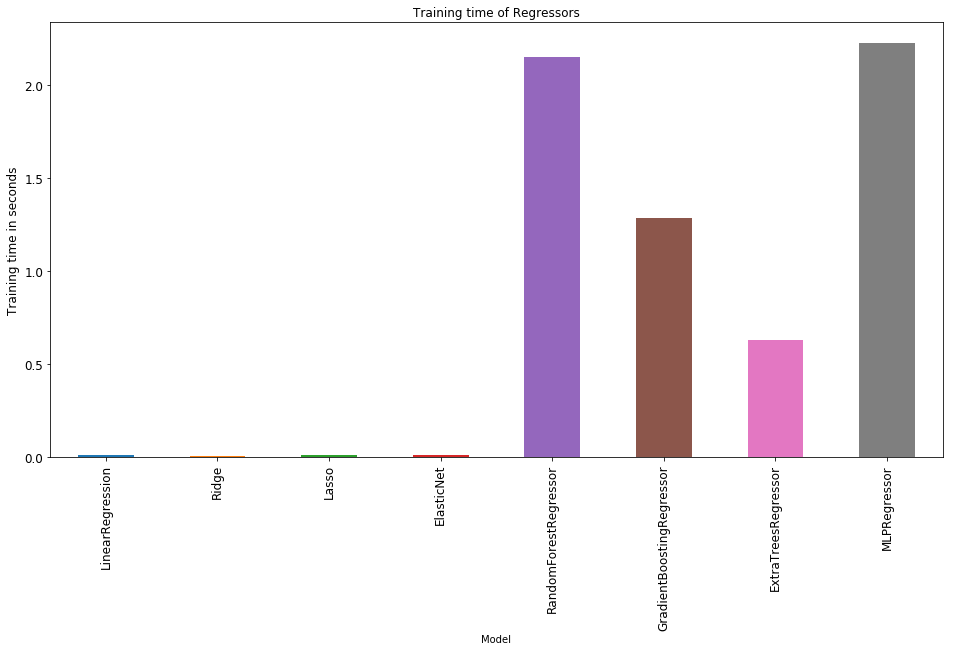

In [36]:
# Plot to compare the training time of algorithms
plt.ylabel("Training time in seconds", fontsize="large")
results_scaled["Training Time"].plot(kind="bar", title="Training time of Regressors",figsize=(16, 8),fontsize="large")

Text(0,0.5,'R2 Score/ RMSE')

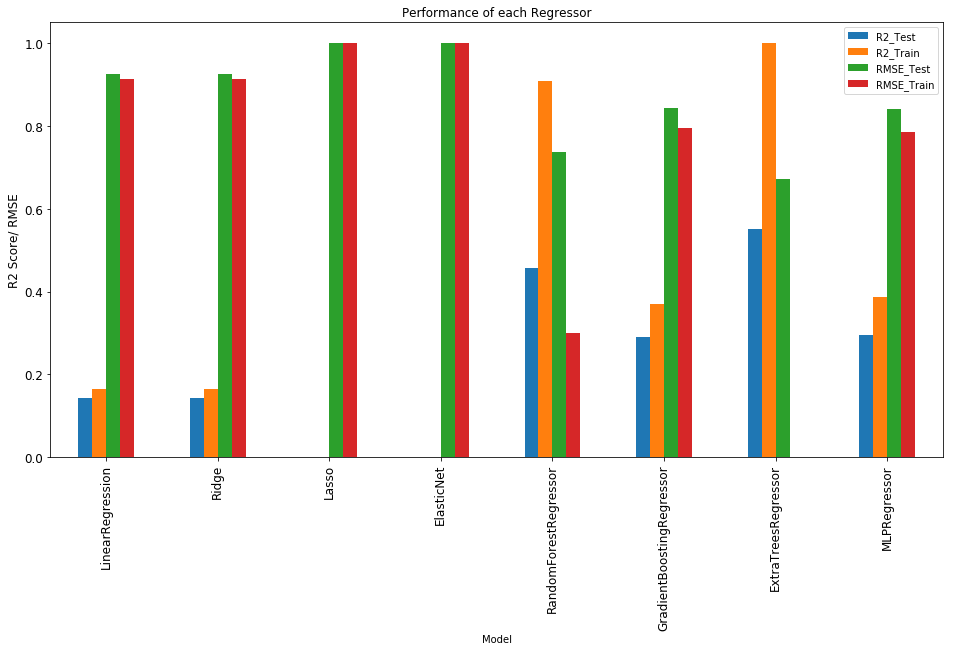

In [35]:
# Plot to compare the performance of the algorithms on both datasets
ax= results_scaled[["R2_Test", "R2_Train", "RMSE_Test","RMSE_Train"]].plot(kind="bar", title="Performance of each Regressor", figsize=(16, 8),fontsize="large")
ax.set_ylabel("R2 Score/ RMSE", fontsize="large")

- Least performing Regressor - Lasso Regressor,ElasticNet
- Best performing Regressor - Extra Trees Regressor

Even though Extra Trees Regressor has a R2 score of 1.0 on traininig set, which might suggest overfitting but, it has the highest score on test set and also, it's RMSE value is also the lowest. 
Clearly, <b>ExtraTreesRegressor</b> is the best model out of given models.